<a href="https://colab.research.google.com/github/CodeHunterOfficial/Practical-Time-Series-Analysis/blob/main/Notfullin%20-%20%20ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pandas import read_csv
from datetime import datetime
from pandas import DataFrame
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
from scipy.stats import boxcox

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
import pandas as pd

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
df = read_csv('drive/MyDrive/shampoo_sales.csv')

In [ ]:
df

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


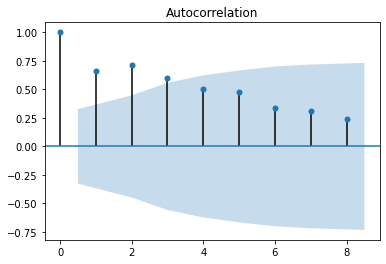

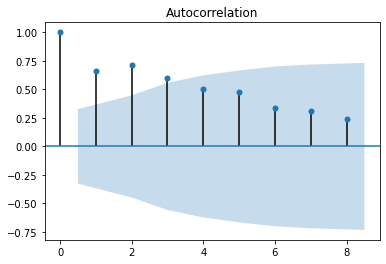

In [ ]:
plot_acf(df['Sales'], lags=8)

In [ ]:
max_initial, min_initial = max(df['Sales']), min(df['Sales'])

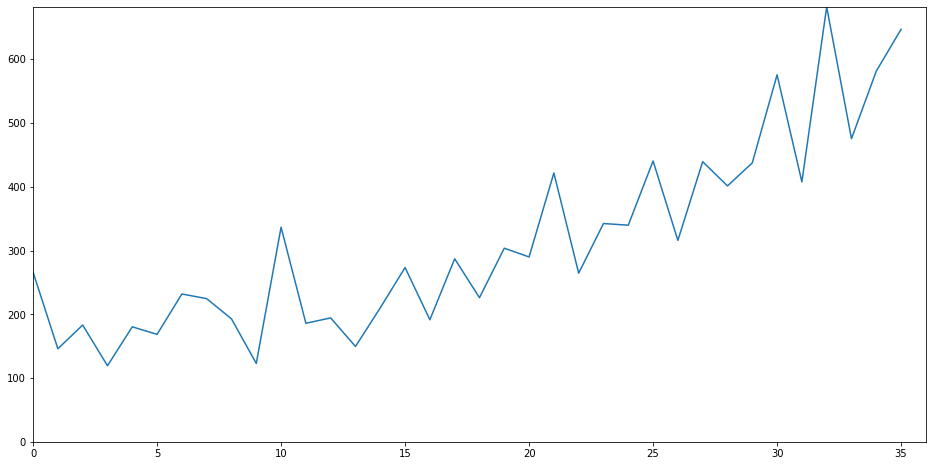

In [ ]:
plt.figure(figsize=(16, 8))
plt.axis([0, len(df['Month']), 0, max_initial])
plt.plot([i for i in range(len(df['Month']))], df['Sales'])

In [ ]:
result = adfuller(df['Sales'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: 3.060142
p-value: 1.000000
Critical Values:
	1%: -3.724
	5%: -2.986
	10%: -2.633


**Проводим дифференцирование**

In [ ]:
differentiation = lambda data: [data[i] - data[i-1] for i in range(1,len(data))]

In [ ]:
diff = differentiation(df['Sales'])
# diff = differentiation(diff)

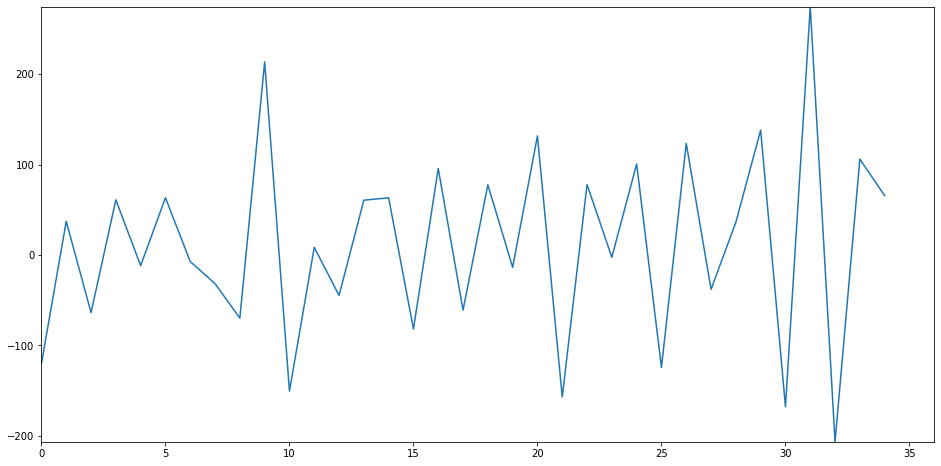

In [ ]:
plt.figure(figsize=(16, 8))
plt.axis([0, len(df['Month']), min(diff), max(diff)])
plt.plot([i for i in range(len(df['Month'])-1)], diff)

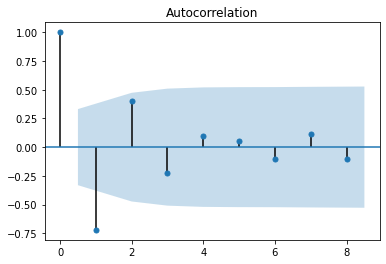

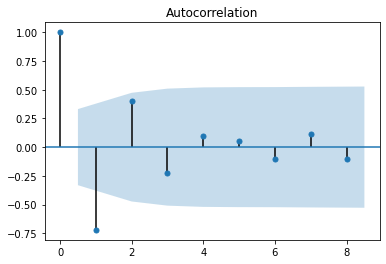

In [ ]:
plot_acf(diff, lags=8)

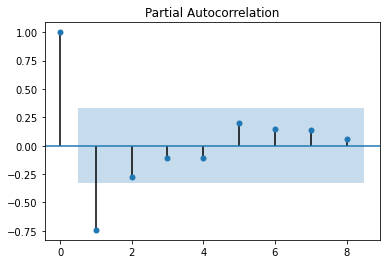

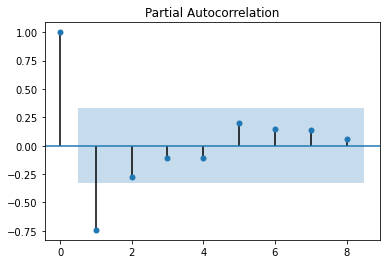

In [ ]:
plot_pacf(diff, lags=8)

In [ ]:
result = adfuller(diff)

In [ ]:
# На основе полученных результатов делаем вывод о стационарности ряда p~0
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.249074
p-value: 0.000000
Critical Values:
	1%: -3.646
	5%: -2.954
	10%: -2.616


In [ ]:
def evaluate_arima_model(X, arima_order):
  # prepare training dataset
  train_size = int(len(X) * 0.66)
  train, test = X[0:train_size], X[train_size:]
  history = [x for x in train]
  # make predictions
  predictions = list()
  for t in range(len(test)):
    model = ARIMA(history, order=arima_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test[t])
  rmse = sqrt(mean_squared_error(test, predictions))
  return rmse

In [ ]:
def evaluate_models(dataset, p_values, d_values, q_values):
  dataset = dataset.astype('float32')
  best_score, best_cfg = float("inf"), None
  for p in p_values:
    for d in d_values:
      for q in q_values:
        order = (p,d,q)
        try:
          rmse = evaluate_arima_model(dataset, order)
          if rmse < best_score:
            best_score, best_cfg = rmse, order
          print('ARIMA%s RMSE=%.3f' % (order,rmse))
        except:
          continue
  print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [ ]:
import warnings
p_values = [0, 1, 2, 4, 6]
d_values = [1]
q_values = [1,2,3]
warnings.filterwarnings("ignore")
evaluate_models(df['Sales'].values, p_values, d_values, q_values)

ARIMA(0, 1, 1) RMSE=104.077
ARIMA(0, 1, 3) RMSE=69.566
ARIMA(1, 1, 1) RMSE=87.942
ARIMA(1, 1, 2) RMSE=90.986
ARIMA(1, 1, 3) RMSE=79.760
ARIMA(2, 1, 1) RMSE=88.428
ARIMA(2, 1, 2) RMSE=83.496
ARIMA(2, 1, 3) RMSE=72.453
ARIMA(4, 1, 1) RMSE=84.820
ARIMA(4, 1, 2) RMSE=84.207
ARIMA(4, 1, 3) RMSE=80.715
ARIMA(6, 1, 1) RMSE=78.365
ARIMA(6, 1, 2) RMSE=74.221
ARIMA(6, 1, 3) RMSE=75.460
Best ARIMA(0, 1, 3) RMSE=69.566


In [ ]:
train_size = int(len(df['Sales']) * 0.66)
train, test = df['Sales'][0:train_size].tolist(), df['Sales'][train_size:].tolist()
history = [x for x in train]
# make predictions
predictions = list()
model = None
for t in range(len(test)):
  model = ARIMA(history, order=(0,1,3))
  model_fit = model.fit()
  yhat = model_fit.forecast()[0]
  predictions.append(yhat)
  history.append(test[t])

k=3
history = history+test
for t in range(k):
  model = ARIMA(history, order=(0,1,3))
  model_fit = model.fit()
  yhat = model_fit.forecast()[0]
  predictions.append(yhat)
  history.append(yhat)

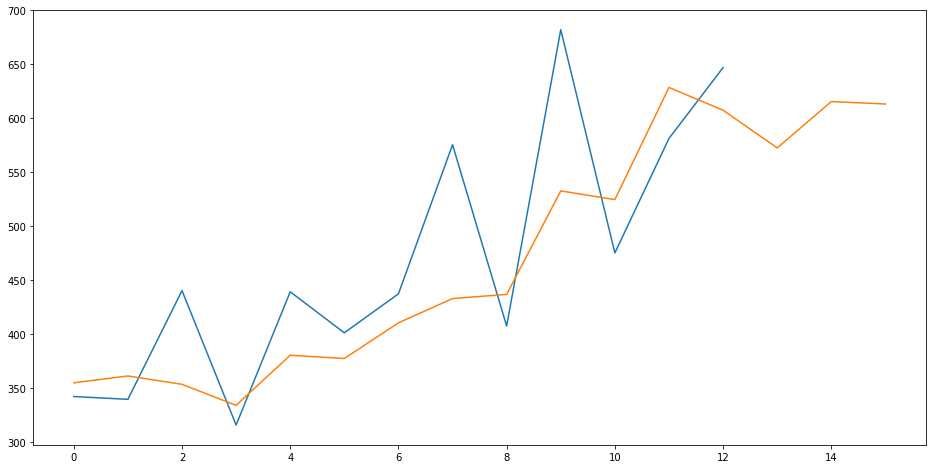

In [ ]:
# plot forecasts against actual outcomes
plt.figure(figsize=(16,8))
plt.plot([i for i in range(len(test))], test)
plt.plot([i for i in range(len(predictions))], predictions)
plt.show()

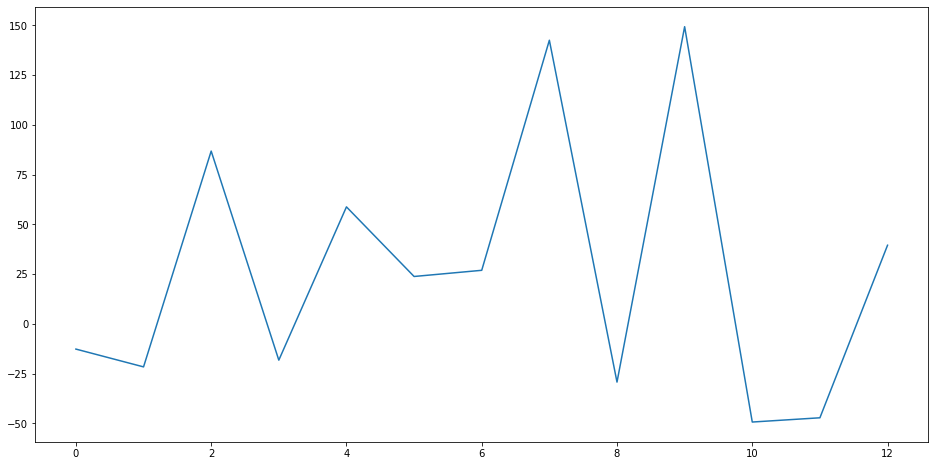

In [ ]:
errors = [test[i]-predictions[i] for i in range(len(test))]
# plot forecasts against actual outcomes
plt.figure(figsize=(16,8))
plt.plot([i for i in range(len(test))], errors)
plt.show()


In [ ]:
result = adfuller(errors)

In [ ]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.087726
p-value: 0.249479
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803
